In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./nice.mplstyle')
data = pd.read_csv('../data/fits/bulk_flow_bootstrap_lightcone0.csv')
data

,scaling_relation,zmax,ubf,lon,lat,sigma,chi2
0,LX-T,0.06,320.0,-120.0,-50.0,0.1245,1.039841
1,LX-T,0.06,320.0,-140.0,-30.0,0.1180,1.039274
2,LX-T,0.06,470.0,-140.0,0.0,0.1150,1.035084
3,LX-T,0.06,425.0,140.0,10.0,0.1190,1.035835
4,LX-T,0.06,215.0,-80.0,-10.0,0.1195,1.033893
...,...,...,...,...,...,...,...
1041,M-T,0.10,290.0,-80.0,20.0,0.0630,1.037209
1042,M-T,0.10,410.0,-100.0,10.0,0.0665,1.031312
1043,M-T,0.10,440.0,-180.0,20.0,0.0665,1.035059
1044,M-T,0.10,590.0,-100.0,-10.0,0.0650,1.036467


In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 5))
labels = ['$L_\\mathrm{{X}}$-$T$', '$Y_\\mathrm{{SZ}}$-$T$', '$M_\\mathrm{{gas}}$-$T$']
for i, relation in enumerate(['LX-T', 'YSZ-T', 'M-T']):
    label = labels[i]
    mask = (data['scaling_relation']==relation) & (data['zmax']==0.08)

    ax[0, i].set(title=label)
    sns.histplot(data['ubf'].loc[mask], stat='density', bins=np.linspace(100, 650, 10), ax=ax[0, i], label=label)
    sns.histplot(data['lon'].loc[mask], stat='density', bins=np.linspace(-180, 180, 10), ax=ax[1, i], label=label)
    sns.histplot(data['lat'].loc[mask], stat='density', bins=np.linspace(-90, 90, 10), ax=ax[2, i], label=label)

fig.suptitle('z<0.08', y=0.98)
fig.tight_layout()
plt.show()

/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data1/yujiehe/conda-env/halo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

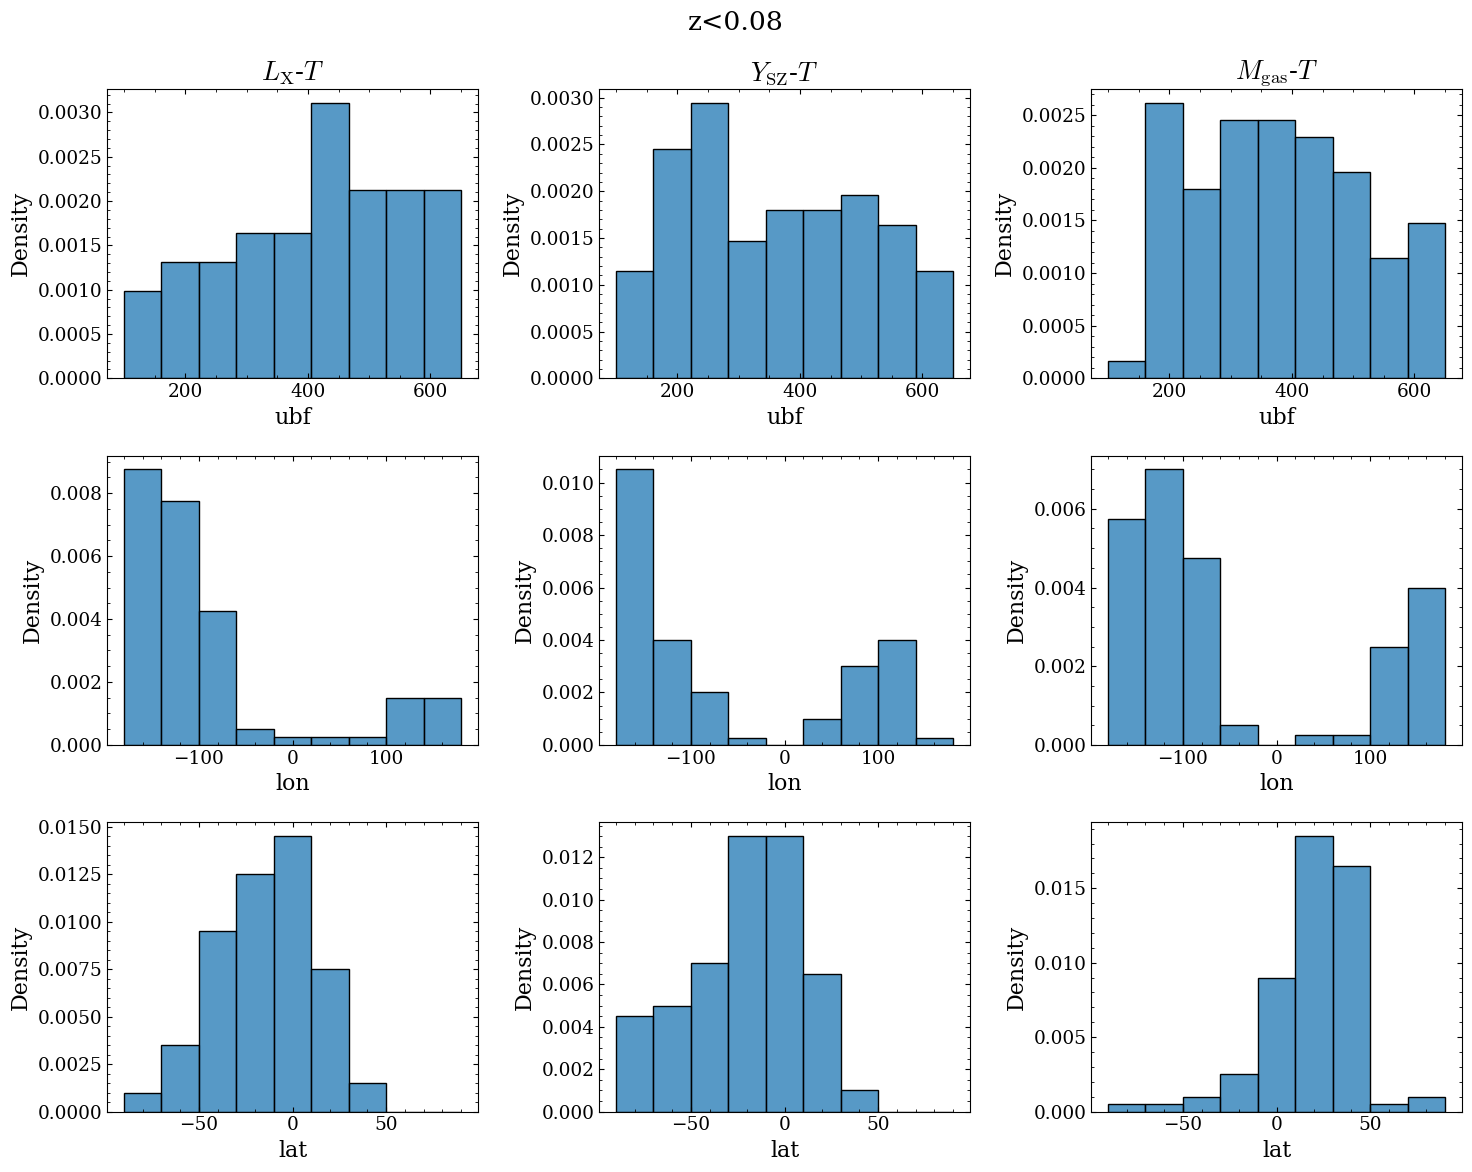

In [56]:

fig, ax = plt.subplots(3, 3, figsize=(15, 12))
labels = ['$L_\\mathrm{{X}}$-$T$', '$Y_\\mathrm{{SZ}}$-$T$', '$M_\\mathrm{{gas}}$-$T$']
for i, relation in enumerate(['LX-T', 'YSZ-T', 'M-T']):
    label = labels[i]
    mask = (data['scaling_relation']==relation) & (data['zmax']==0.08)

    ax[0, i].set(title=label)
    sns.histplot(data['ubf'].loc[mask], stat='density', bins=np.linspace(100, 650, 10), ax=ax[0, i], label=label)
    sns.histplot(data['lon'].loc[mask], stat='density', bins=np.linspace(-180, 180, 10), ax=ax[1, i], label=label)
    sns.histplot(data['lat'].loc[mask], stat='density', bins=np.linspace(-90, 90, 10), ax=ax[2, i], label=label)

fig.suptitle('z<0.08', y=0.98)
fig.tight_layout()
plt.show()

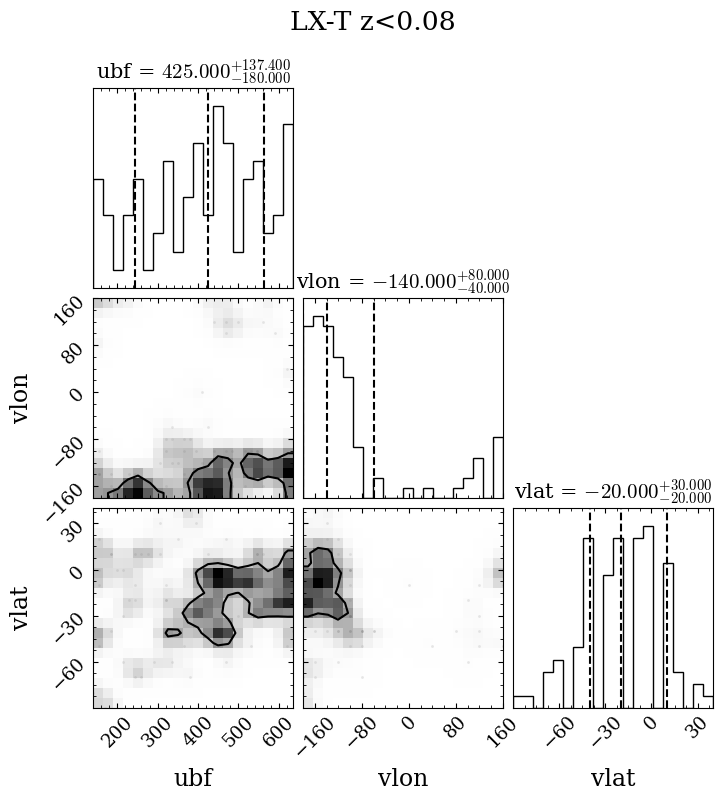

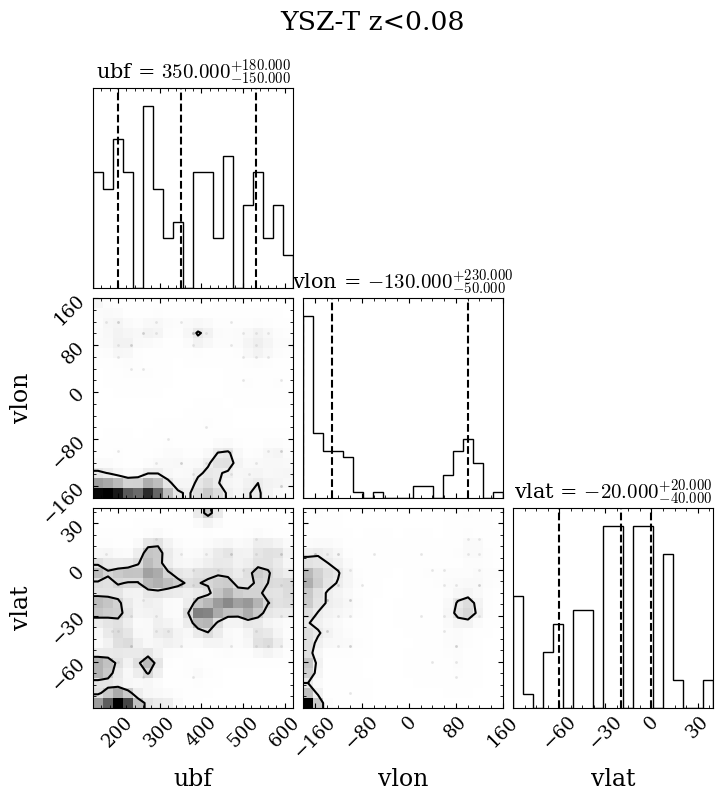

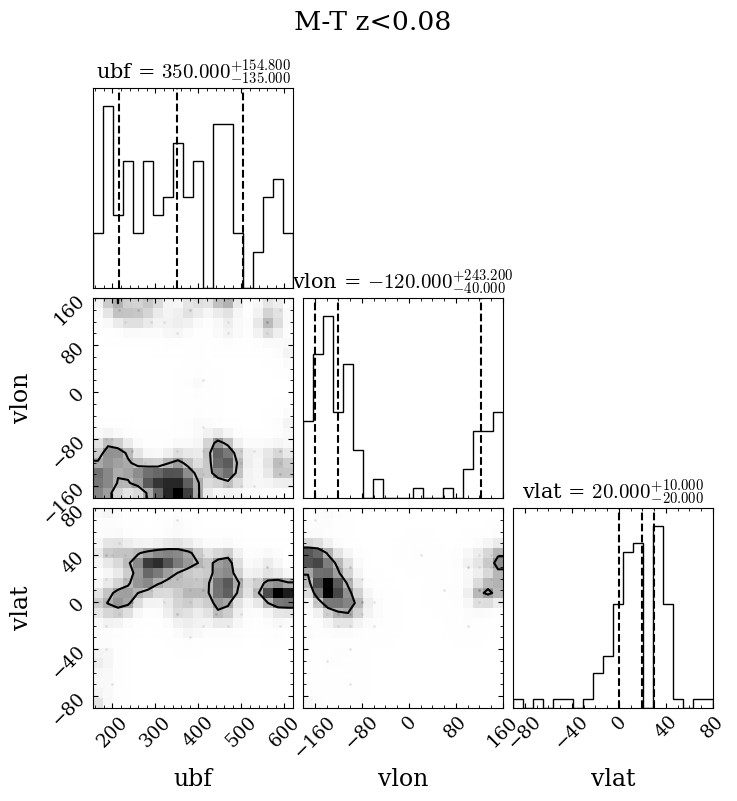

In [71]:
import corner
for i, relation in enumerate(['LX-T', 'YSZ-T', 'M-T']):

    mask = (data['scaling_relation']==relation) & (data['zmax']==0.08)
    flat_samples = data[mask]
    flat_samples = np.array(flat_samples[['ubf','lon','lat']])

    fig = corner.corner(
        flat_samples, 
        labels=['ubf', 'vlon', 'vlat'],
        quantiles=[0.16, 0.5, 0.84],
        show_titles=True, 
        title_fmt='.3f',
        title_kwargs={"fontsize": 15},
        label_kwargs={"fontsize": 17},
        smooth=1,
        levels=[0.39],
    )

    fig.suptitle(relation + ' z<0.08', y=1.05)